### Introduction to the Dataset

The bank dataset used in this project originates from a **Portuguese bank** and contains information about a **marketing campaign** aimed at selling **term deposit** products to customers. Term deposits are a type of savings account with a fixed interest rate for a specified term, making them a safer and more stable financial investment. The goal of the campaign is to encourage both existing and potential customers to subscribe to these term deposits.

This dataset consists of **11,163 rows** and **21 columns**, where each row represents a customer, and the columns contain various features about the customer and their interaction with the bank. The data was collected over a series of marketing campaigns. In this project, a **sample of 1,000 rows** will be used to build a predictive model that can forecast whether a customer will subscribe to a term deposit, based on their characteristics and prior interactions with the bank.

### Overview of the Columns in the Dataset

Below is a detailed description of the columns in the dataset:

- **age**: The age of the customer. This is important because age may influence financial decision-making, risk tolerance, and interest in term deposits.

- **job**: The type of job the customer holds (e.g., "admin.", "blue-collar", "technician", etc.). Job type could reflect the customer’s income level, job stability, and overall financial behavior, which may impact their likelihood of subscribing to a term deposit.

- **marital**: The marital status of the customer (e.g., "married", "single", "divorced"). Marital status can influence financial decisions, as people with families may have different savings goals compared to singles.

- **education**: The level of education the customer has attained (e.g., "primary", "secondary", "tertiary"). A customer’s education level may correlate with their financial knowledge, which could affect their interest in financial products like term deposits.

- **balance**: The average yearly balance in euros. A higher balance could indicate a wealthier or more financially stable customer who may be more likely to invest in a term deposit.

- **contact**: The type of communication used to reach the customer (e.g., "cellular", "telephone"). This column helps understand the methods the bank uses to contact the customer, as different contact types may be more or less effective in reaching customers.

- **day**: The last contact day of the month. This indicates when the final contact attempt was made during the month, which might influence the customer's decision-making process based on timing.

- **month**: The last contact month of the year. The month of contact could reveal seasonal trends that may influence a customer’s decision to invest in a term deposit.

- **duration**: The duration of the last contact in seconds. Longer conversations may indicate higher engagement from the customer, which could increase the likelihood of a positive response.

- **campaign**: The number of contacts made during the current campaign. A **campaign** refers to a series of marketing efforts designed to persuade customers to subscribe to a term deposit. Multiple contacts may indicate persistence and effort to convert the customer.

- **pdays**: The number of days since the customer was last contacted. If the value is **-1**, it means the customer has never been contacted before. The recency of contact could affect the customer’s response.

- **previous**: The number of contacts made during the previous marketing campaign. This column provides context about past interactions and helps assess how previous efforts may influence the current campaign.

- **poutcome**: The outcome of the previous marketing campaign (e.g., "failure", "success", "nonexistent"). This column can help determine whether past success or failure influences future marketing efforts.

- **deposit**: Whether the customer subscribed to a term deposit ("yes" or "no"). This is the **target variable** of the project, and the goal is to predict this column.

- **default**: Whether the customer has a history of defaulting on credit or loan payments ("yes" or "no"). A history of default could influence the customer's financial stability and their willingness to invest in term deposits.

- **housing**: Whether the customer has a housing loan ("yes" or "no"). A housing loan may impact the customer’s financial flexibility, which could make them less likely to subscribe to a term deposit.

- **loan**: Whether the customer has a personal loan ("yes" or "no"). Personal loans can similarly affect a customer's ability to invest in a term deposit, depending on their current financial obligations.

### Aim of the Project

The primary aim of this project is to build a **predictive model** that can accurately predict whether a customer will subscribe to a term deposit, based on their demographic information, contact history, and engagement with previous marketing campaigns. By analyzing these customer features, the goal is to improve the bank's ability to target the right customers, ultimately leading to better conversion rates for their marketing efforts.

In this project, a **Decision Tree Classifier** will be used to create the predictive model. The Decision Tree Classifier will help identify the most important factors that influence whether a customer subscribes to a term deposit, allowing the bank to optimize their marketing strategies.

By applying this model to a sample of customer data, the project will evaluate the effectiveness of using customer characteristics to predict their likelihood of subscribing to a term deposit, improving the overall efficiency of the marketing campaigns.


## **_Let's Get Started with Building the Decision Tree Classifier_**

### _Importing necessary libraries_

In [85]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.preprocessing import LabelEncoder
import matplotlib.pyplot as plt
import seaborn as sns

# 1. Loading the Data

In [86]:
# Load the dataset from 
df_bank = pd.read_csv('bank.csv') 

# Show the first few rows to check the data
df_bank.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,deposit
0,59,admin.,married,secondary,no,2343,yes,no,unknown,5,may,1042,1,-1,0,unknown,yes
1,56,admin.,married,secondary,no,45,no,no,unknown,5,may,1467,1,-1,0,unknown,yes
2,41,technician,married,secondary,no,1270,yes,no,unknown,5,may,1389,1,-1,0,unknown,yes
3,55,services,married,secondary,no,2476,yes,no,unknown,5,may,579,1,-1,0,unknown,yes
4,54,admin.,married,tertiary,no,184,no,no,unknown,5,may,673,2,-1,0,unknown,yes


### Sampling 1000 Observations from the Bank Data

For reasons like:
- **Faster Experimentation**: Using a smaller dataset speeds up the model training and experimentation process.
- **Model Validation**: A 1000-sample subset still provides enough data to validate the model's effectiveness before scaling.
- **Avoiding Overfitting**: A smaller sample helps detect overfitting early, ensuring the model generalizes well before working with the full dataset.


In [87]:
# Take a random sample of 1000 rows from the dataset
bank_sample = df_bank.sample(n=1000, random_state=42)  # random_state for reproducibility

# Show the first few rows of the sampled data to confirm
bank_sample.head()


,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,deposit
5527,65,retired,divorced,secondary,no,744,no,no,cellular,5,jul,182,1,-1,0,unknown,no
4541,38,blue-collar,married,secondary,no,1627,no,no,unknown,16,jun,1323,9,-1,0,unknown,yes
1964,35,blue-collar,single,secondary,no,4963,yes,no,cellular,14,may,456,1,300,1,failure,yes
5007,47,blue-collar,married,secondary,no,8229,no,no,cellular,8,aug,784,2,-1,0,unknown,yes
8928,35,technician,married,tertiary,no,1473,yes,no,unknown,12,may,84,3,-1,0,unknown,no


### 2. Explore the Data

In [88]:
# Check the structure and summary of the data
bank_sample.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1000 entries, 5527 to 9222
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   age        1000 non-null   int64 
 1   job        1000 non-null   object
 2   marital    1000 non-null   object
 3   education  1000 non-null   object
 4   default    1000 non-null   object
 5   balance    1000 non-null   int64 
 6   housing    1000 non-null   object
 7   loan       1000 non-null   object
 8   contact    1000 non-null   object
 9   day        1000 non-null   int64 
 10  month      1000 non-null   object
 11  duration   1000 non-null   int64 
 12  campaign   1000 non-null   int64 
 13  pdays      1000 non-null   int64 
 14  previous   1000 non-null   int64 
 15  poutcome   1000 non-null   object
 16  deposit    1000 non-null   object
dtypes: int64(7), object(10)
memory usage: 140.6+ KB


In [89]:
# Check for missing values
print('Missing values in the dataset:')
print(bank_sample.isnull().sum())

Missing values in the dataset:
age          0
job          0
marital      0
education    0
default      0
balance      0
housing      0
loan         0
contact      0
day          0
month        0
duration     0
campaign     0
pdays        0
previous     0
poutcome     0
deposit      0
dtype: int64


### The sample dataset has no missing values.

In [90]:
# Check data types of each column
print('Data types of each column:')
print(bank_sample.dtypes)

Data types of each column:
age           int64
job          object
marital      object
education    object
default      object
balance       int64
housing      object
loan         object
contact      object
day           int64
month        object
duration      int64
campaign      int64
pdays         int64
previous      int64
poutcome     object
deposit      object
dtype: object


In [91]:
# Show summary statistics of the numerical columns
print('Summary statistics of numerical columns:')
print(bank_sample.describe())

Summary statistics of numerical columns:
               age       balance          day     duration     campaign  \
count  1000.000000   1000.000000  1000.000000  1000.000000  1000.000000   
mean     41.355000   1590.450000    16.038000   384.816000     2.573000   
std      12.308146   3049.668042     8.349987   365.239952     2.992261   
min      18.000000  -1636.000000     1.000000     7.000000     1.000000   
25%      32.000000    143.250000     9.000000   142.000000     1.000000   
50%      38.000000    590.500000    16.000000   262.000000     2.000000   
75%      50.000000   1764.500000    22.000000   498.500000     3.000000   
max      93.000000  29184.000000    31.000000  3284.000000    43.000000   

             pdays     previous  
count  1000.000000  1000.000000  
mean     56.261000     0.946000  
std     113.912137     2.684453  
min      -1.000000     0.000000  
25%      -1.000000     0.000000  
50%      -1.000000     0.000000  
75%      88.250000     1.000000  
max     826

In [92]:
# Check for unique values in the target column ('deposit')
print('Unique values in the target column (deposit):')
print(bank_sample['deposit'].value_counts())


Unique values in the target column (deposit):
deposit
no     528
yes    472
Name: count, dtype: int64


# 4. Data Preprocessing

### _4.1 Encoding Categorical Features_

In [93]:
# List of categorical columns
categorical_columns = ['job', 'marital', 'education', 'default', 'housing', 'loan', 'contact', 'month', 'poutcome', 'deposit']

# Print unique values for each categorical column
for col in categorical_columns:
    unique_values = bank_sample[col].unique()
    print(f"Unique values in '{col}': {unique_values}")

Unique values in 'job': ['retired' 'blue-collar' 'technician' 'management' 'admin.'
 'self-employed' 'student' 'entrepreneur' 'services' 'housemaid'
 'unemployed' 'unknown']
Unique values in 'marital': ['divorced' 'married' 'single']
Unique values in 'education': ['secondary' 'tertiary' 'primary' 'unknown']
Unique values in 'default': ['no' 'yes']
Unique values in 'housing': ['no' 'yes']
Unique values in 'loan': ['no' 'yes']
Unique values in 'contact': ['cellular' 'unknown' 'telephone']
Unique values in 'month': ['jul' 'jun' 'may' 'aug' 'jan' 'feb' 'apr' 'nov' 'oct' 'dec' 'mar' 'sep']
Unique values in 'poutcome': ['unknown' 'failure' 'success' 'other']
Unique values in 'deposit': ['no' 'yes']


In [94]:
# Initialize LabelEncoder
label_encoder = LabelEncoder()

# List of columns to encode
categorical_columns = ['job', 'marital', 'education', 'default', 'housing', 'loan', 'contact', 'month', 'poutcome', 'deposit']

# Encode categorical columns
for col in categorical_columns:
    bank_sample[col] = label_encoder.fit_transform(bank_sample[col])

# Check the first few rows after encoding
bank_sample.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,deposit
5527,65,5,0,1,0,744,0,0,0,5,5,182,1,-1,0,3,0
4541,38,1,1,1,0,1627,0,0,2,16,6,1323,9,-1,0,3,1
1964,35,1,2,1,0,4963,1,0,0,14,8,456,1,300,1,0,1
5007,47,1,1,1,0,8229,0,0,0,8,1,784,2,-1,0,3,1
8928,35,9,1,2,0,1473,1,0,2,12,8,84,3,-1,0,3,0


### _Encoding Mappings for Categorical Variables_

- **job**: `{'admin.': 0, 'blue-collar': 1, 'entrepreneur': 2, 'housemaid': 3, 'management': 4, 'retired': 5, 'self-employed': 6, 'services': 7, 
              'student': 8, 'technician': 9, 'unemployed': 10, 'unknown': 11}`
- **marital**:  `{'divorced': 0, 'married': 1, 'single': 2}`
- **education**: `{'primary': 0, 'secondary': 1, 'tertiary': 2, 'unknown': 3}`
- **default**: `{'no': 0, 'yes': 1}`
- **housing**: `{'no': 0, 'yes': 1}`
- **loan**: `{'no': 0, 'yes': 1}`
- **contact**: `{'cellular': 0, 'telephone': 1, 'unknown': 2}`
- **month**: `{'apr': 0, 'aug': 1, 'dec': 2, 'feb': 3, 'jan': 4, 'jul': 5, 'jun': 6, 'mar': 7, 'may': 8, 'nov': 9, 'oct': 10, 'sep': 11}`
- **poutcome**: `{'failure': 0, 'nonexistent': 1, 'success': 2}`
- **deposit**: `{'no': 0, 'yes': 1}`
   

#### _The Need for Encoding_

In machine learning, **encoding** is necessary to convert categorical data (like job types or marital status) into a numerical format. Many algorithms, including decision trees, cannot work directly with categorical data, as they require numerical inputs for calculations. By encoding categorical variables, we transform this data into a format that models can interpret, allowing us to effectively use it in predictions, classifications, or other analyses.


### _4.2 Splitting Data into Features and Target_

In [95]:
# Features (X) and Target (y)
X = bank_sample.drop('deposit', axis=1)  # Features (all columns except 'deposit')
y = bank_sample['deposit']              # Target (the 'deposit' column)

# Splitting the dataset into training and testing sets (80% for training, 20% for testing)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Check the shape of the resulting datasets
print(f'Training Features Shape: {X_train.shape}')
print(f'Testing Features Shape: {X_test.shape}')

Training Features Shape: (800, 16)
Testing Features Shape: (200, 16)


#### _The Need for Splitting Target and Features, and Creating Training and Testing Sets_

In machine learning, we split our data into **features (X)** and the **target variable (y)** to define what we’re trying to predict based on other information. This separation allows us to train the model on relevant predictors (features) and test its accuracy on the outcome we care about (target).

We further split data into **training and testing sets** for these reasons:

- **Training Set**: This subset is used to train the model, allowing it to learn patterns from the data.
- **Testing Set**: This subset is kept separate to evaluate the model’s performance on unseen data, ensuring its predictions generalize well.

This approach prevents overfitting and helps us gauge the model’s effectiveness.

### 5. Model Building

In [96]:
# Initialize the Decision Tree Classifier
clf = DecisionTreeClassifier(random_state=42)

# Train the model using the training set
clf.fit(X_train, y_train)

DecisionTreeClassifier(random_state=42)

### 6. Model Prediction

In [97]:
# Make predictions using the trained model
y_pred = clf.predict(X_test)

# Check the first few predictions
print(y_pred[:10])


[1 1 0 1 1 1 0 1 0 1]


### 7. Model Evaluation

#### _7.1 Accuracy Score_

In [98]:
# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy * 100:.2f}%')


Accuracy: 71.50%


#### _7.2 Confusion Matrix_

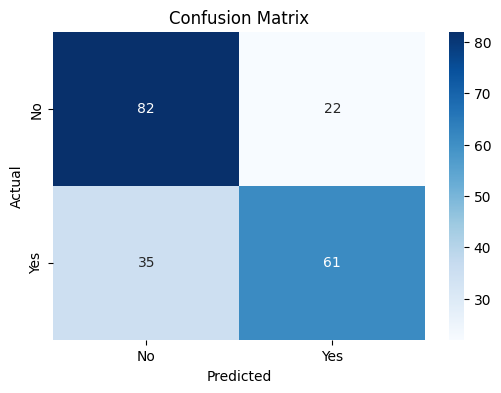

In [99]:
# Confusion Matrix
conf_matrix = confusion_matrix(y_test, y_pred)

# Visualizing the confusion matrix
plt.figure(figsize=(6, 4))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=['No', 'Yes'], yticklabels=['No', 'Yes'])
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()


#### _7.3 Classification Report_

In [ ]:
# Classification Report
print(classification_report(y_test, y_pred, target_names=['No Deposit', 'Subscribed']))

              precision    recall  f1-score   support

  No Deposit       0.70      0.79      0.74       104
  Subscribed       0.73      0.64      0.68        96

    accuracy                           0.71       200
   macro avg       0.72      0.71      0.71       200
weighted avg       0.72      0.71      0.71       200



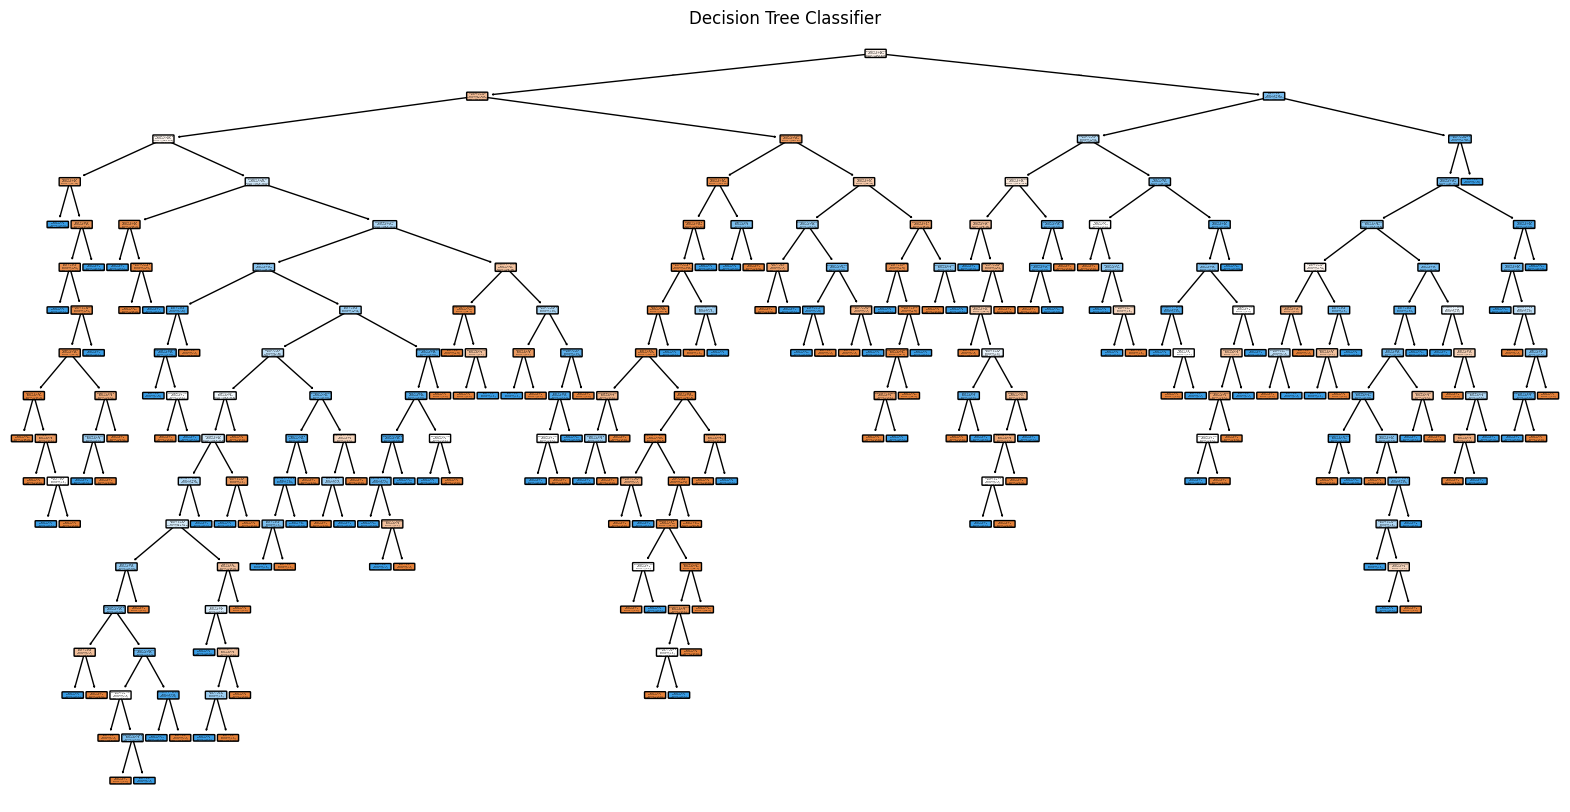

In [101]:
from sklearn.tree import plot_tree

# Plot the Decision Tree
plt.figure(figsize=(20, 10))
plot_tree(clf, filled=True, feature_names=X.columns, class_names=['No Deposit', 'Subscribed'], rounded=True)
plt.title('Decision Tree Classifier')
plt.show()


In [102]:
from sklearn.model_selection import GridSearchCV

# Define parameter grid for tuning
param_grid = {
    'max_depth': [3, 5, 7, 10],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

# Initialize GridSearchCV
grid_search = GridSearchCV(DecisionTreeClassifier(random_state=42), param_grid, cv=5)

# Fit the grid search to the training data
grid_search.fit(X_train, y_train)

# Get the best parameters
print(f'Best Parameters: {grid_search.best_params_}')


Best Parameters: {'max_depth': 5, 'min_samples_leaf': 1, 'min_samples_split': 2}
